# Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not

In [1]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Number of rows and columns
df.shape

(891, 12)

In [4]:
# getting data-types of the data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# getting some statistical measure about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# checking the number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Handling the missing values
df = df.drop(columns = "Cabin",axis = 1)

In [10]:
# Replacing the missing values in "Age" column with mean value
df["Age"].fillna(df["Age"].mean(),inplace = True)

In [11]:
# finding the mode value "Embarked"
print(df["Embarked"].mode())

0    S
dtype: object


In [12]:
# replacing the missing values in "Embarked" column with mode value
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace = True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# finding the number of people survived and not survived
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

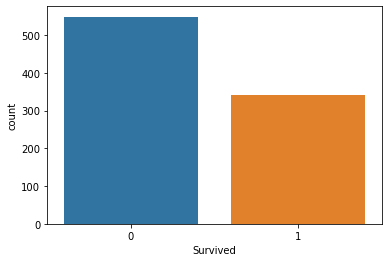

In [15]:
# making a count plot for "Survived" column
sns.countplot('Survived',data= df)

In [16]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

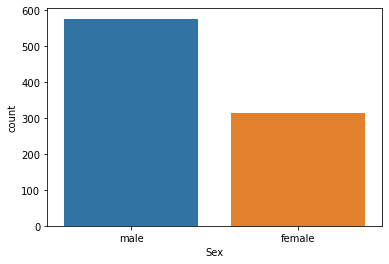

In [17]:
# making a count plot for "Sex" column
sns.countplot('Sex',data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

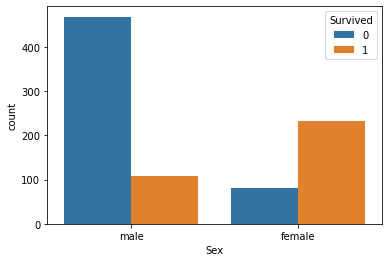

In [18]:
# number of survivors Gender wis
sns.countplot('Sex',hue = 'Survived',data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

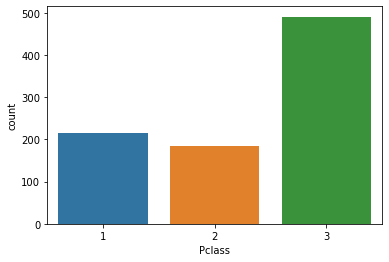

In [19]:
sns.countplot("Pclass",data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

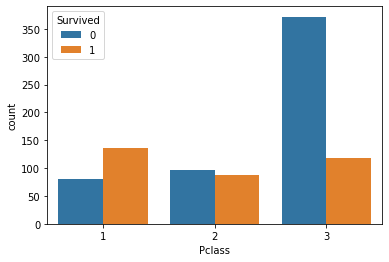

In [20]:
# making a count plot for "Pclass" column
sns.countplot('Pclass',hue = 'Survived',data = df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

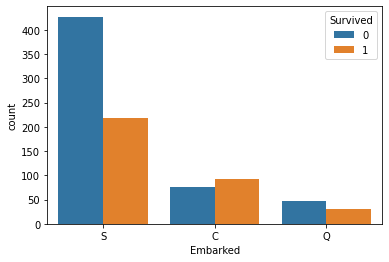

In [21]:
# making a count plot for "Embarked" column
sns.countplot('Embarked',hue = 'Survived',data = df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

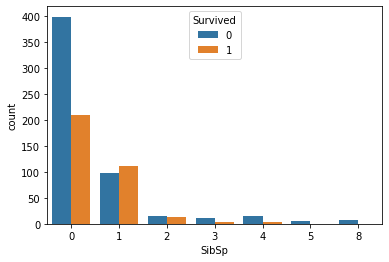

In [22]:
# making a count plot for "SibSp" column
sns.countplot('SibSp',hue = 'Survived',data = df)

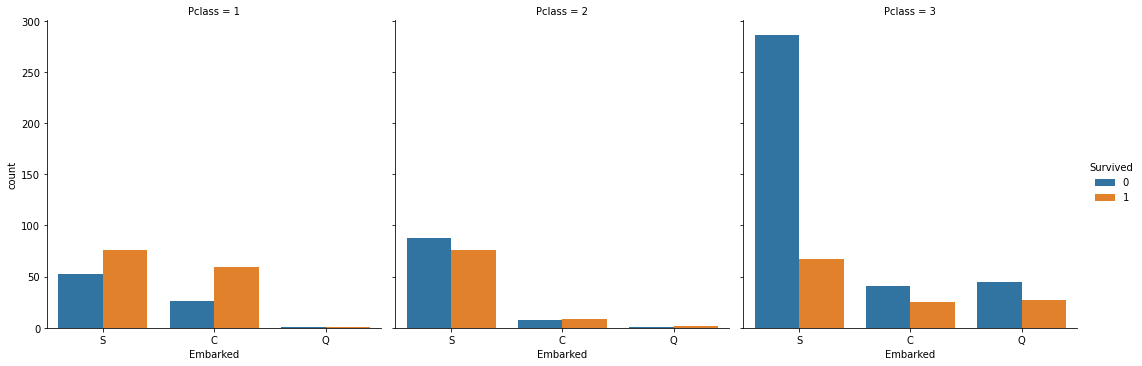

In [25]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

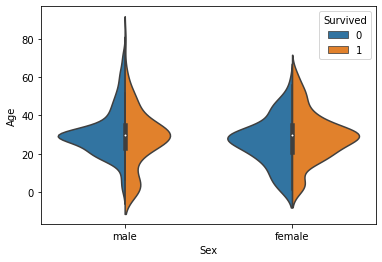

In [24]:

# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = df, split = True)

# Encoding the Categorical Columns

In [26]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
# Coverting categorical columns
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Separating features & Traget variable

In [30]:
x = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis = 1)
y = df['Survived']

In [31]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [32]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# splitting the data into traning data & test data 

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [34]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


In [35]:
print(x_test.shape)

(179, 7)


# Model Testing & Evaluation

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [37]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
predlg = lg.predict(x_test)
acc_lg = round(lg.score(x_train,y_train)*100,3,)
print(acc_lg)

80.758


In [38]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
acc_dt = round(dt.score(x_train, y_train) * 100, 3)
print(acc_dt)

98.596


In [39]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
predGNB = GNB.predict(x_test)
acc_GNB = round(GNB.score(x_train, y_train) * 100,3)
print(acc_GNB)

79.354


In [40]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 3)
print(acc_knn)

80.618


In [41]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 3)
print(acc_svc)

67.978


In [42]:
rfc =  RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc = rfc.predict(x_test)
acc_rfc = round(rfc.score(x_train, y_train) * 100, 3)
print(acc_rfc)

98.596


In [43]:
from sklearn.model_selection import cross_val_score


score  = cross_val_score(lg,x,y,cv = 5)
print(score)
print(score.mean())
print(score.std())

[0.79329609 0.78651685 0.79213483 0.76966292 0.8258427 ]
0.7934906785512522
0.01824787934598037


In [44]:
from sklearn.model_selection import KFold

score = cross_val_score(knn,x,y,cv = 9)
print(score)
print(score.mean())
print(score.std())


[0.61616162 0.63636364 0.68686869 0.72727273 0.68686869 0.68686869
 0.70707071 0.6969697  0.74747475]
0.6879910213243546
0.0385207683540528


In [45]:
score = cross_val_score(dt,x,y,cv = 4)
print(score)
print(score.mean())
print(score.std())

[0.71300448 0.79820628 0.80717489 0.76576577]
0.7710378539974951
0.03687707755218153


In [46]:
score = cross_val_score(GNB,x,y,cv = 9)
print(score)
print(score.mean())
print(score.std())

[0.76767677 0.76767677 0.76767677 0.85858586 0.7979798  0.75757576
 0.7979798  0.77777778 0.7979798 ]
0.787878787878788
0.028964058138190675


In [47]:
score = cross_val_score(svc,x,y,cv = 5)
print(score)
print(score.mean())
print(score.std())

[0.59217877 0.71348315 0.69101124 0.68539326 0.69101124]
0.674615529470843
0.04233274996749585


In [48]:
score = cross_val_score(rfc,x,y,cv = 5)
print(score)
print(score.mean())
print(score.std())

[0.76536313 0.80898876 0.85955056 0.78651685 0.83707865]
0.8114995919904588
0.03382956906707067


In [49]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg_cv=GridSearchCV(lg,grid,cv=10)
lg_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lg_cv.best_params_)
print("accuracy :",lg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8102895148669796


In [50]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"max_depth":range(1,10),"min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}


In [51]:
from sklearn.base import clone
grid_search_cv = GridSearchCV(dt,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(x_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [52]:
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 9}
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=9)
0.8286580594679187


In [53]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print('Accuracy::',accuracy_score(y_test,y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy:: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       100
           1       0.83      0.75      0.79        79

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.82      0.82      0.82       179



In [54]:
LG=print("Accuracy_score of Logistic:",accuracy_score(y_test,predlg))
DT=print('Accuracy_score of Decision Tree::',accuracy_score(y_test,preddt))
RF=print('Accuracy_score of Random Forest::',accuracy_score(y_test,y_pred2))

Accuracy_score of Logistic: 0.7821229050279329
Accuracy_score of Decision Tree:: 0.7932960893854749
Accuracy_score of Random Forest:: 0.8212290502793296


In [55]:
import pickle
filename="Titanic survival.pk1"
pickle.dump(rfc,open(filename,'wb'))

In [56]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rfc.predict(x_test))
df_titanic=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [57]:
df_titanic

,orginal,predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
174,0,0
175,0,0
176,0,0
177,0,0
